# Heart rate detection example codes
Hardware 1 - Orientation to Health Technology<br>
Sakari Lukkarinen, 2.1.2024<br>
Metropolia University of Applied Sciences<br>

## Introduction
This notebooks shows how to read in the example data and show graphically the PPG signal.

## Installation
Remove the comment and run the installation code, if needed.

In [218]:
# %pip install numpy matplotlib heartpy


## Setup
Read in the necessary modules.

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

## Read data
The following code reads the data into a numpy array named `data` and creates a time vector, so we can plot the data.

In [220]:
# Reads the file into a numpy array
data = hp.get_data('capture01_250Hz.txt')
# Create a time vector
Fs = 250 # Sampling rate (samples per second)
time = np.arange(len(data))/Fs

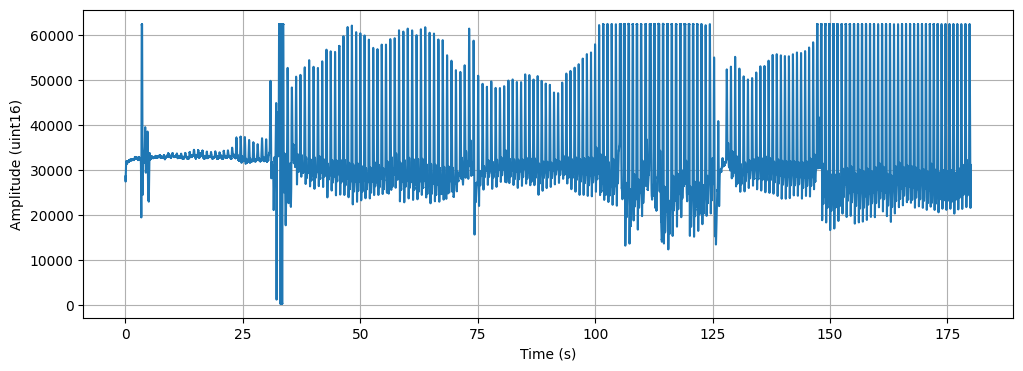

In [221]:
# Plot the whole data in a graphical figure
plt.figure(figsize = (12, 4))
plt.plot(time, data)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()

## Data segment
Select randomly a 60 second data segment.

Segment starts from: 51 s


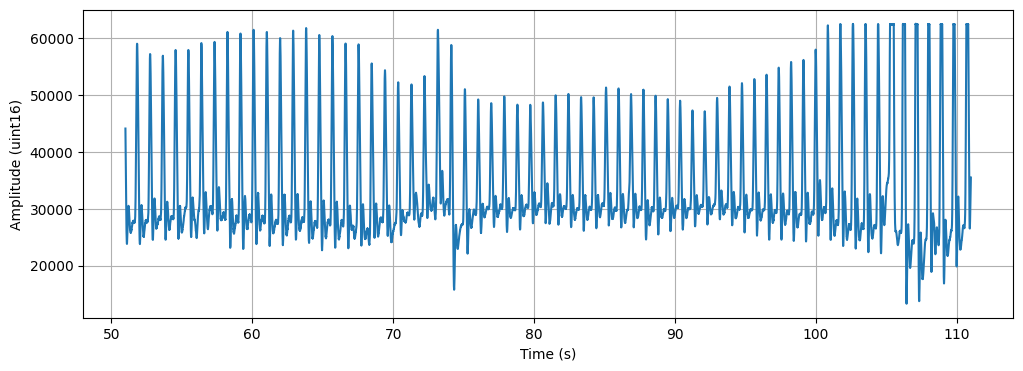

In [222]:
# Random seed based on the last four digits of the student ID number
np.random.seed(8632)
t0 = np.random.randint(30, 100)
print(f'Segment starts from: {t0} s')

# Select a segment
i = (t0 < time) & (time < t0 + 60)
data2 = data[i]
time2 = time[i]

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()


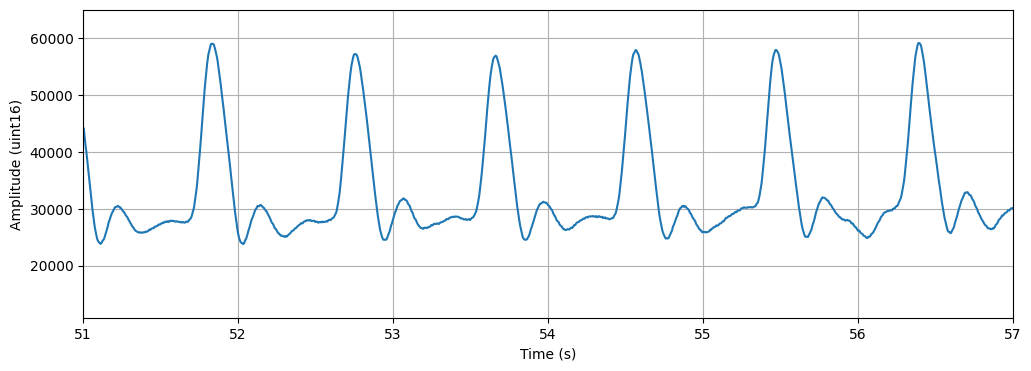

In [223]:
# Zoom in to the first 6 seconds to show the details of the signal

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.xlim(t0, t0 + 6)
plt.show()

## Peak detection and HRV measurements

Study the example codes found in heartpy’s documentation [Analysing a PPG signal](https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/1_regular_PPG/Analysing_a_PPG_signal.ipynb) and [Plotting results](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/quickstart.html#plotting-results) to process the selected data segment and show the peak detection and HRV measurements results.

bpm: 66.2
ibi: 906.28
sdnn: 28.37
sdsd: 13.87
rmssd: 18.26
pnn20: 0.17
pnn50: 0.03
hr_mad: 24.0
sd1: 12.9
sd2: 37.35
s: 1513.9
sd1/sd2: 0.35
breathingrate: 0.23


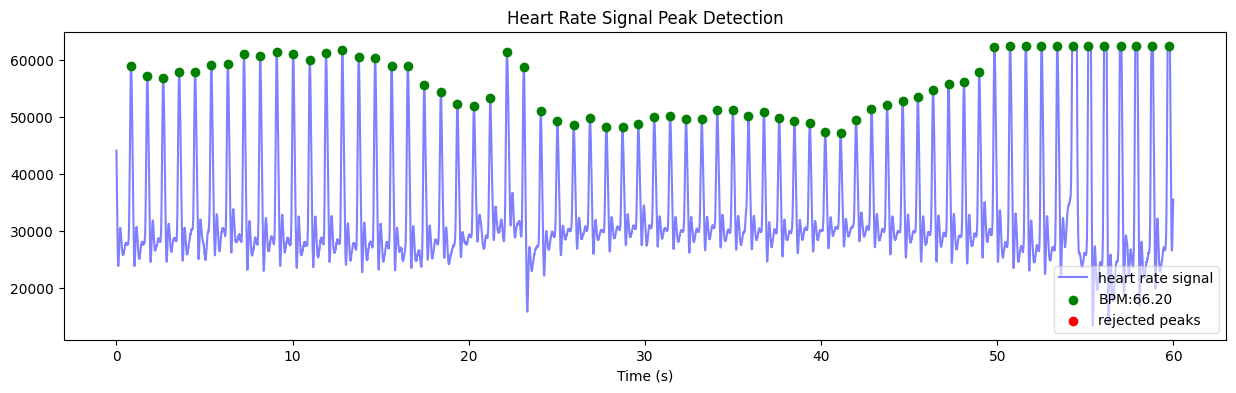

In [224]:
working_data, measures = hp.process(data2, 250.0)
plot_object = hp.plotter(working_data, measures, show=False, figsize=(15, 4))
for item in measures:
    print(item + ": " + str(round(measures[item], 2)))
plt.show()